# Setup

In [66]:
%matplotlib notebook
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import seaborn as sn
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."

CHAPTER_ID = 'Naive Bayesian'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Datasets

In [122]:
path = '../processeddata/individual_stocks_5yr/individual_stocks_5yr/'
ticker = 'T' # Change Stock to analyze

p = path + ticker + '_data.csv' 
df = pd.read_csv(p)
df.set_index(['date'],inplace=True)

df['Movement'] = 'Up'

prevPrice = 0.0
for index, row in df.iterrows():
    if row['close'] < prevPrice:
        df.loc[index, 'Movement'] = 'Down'
    prevPrice = row['close']
    
df.head(10)

,open,high,low,close,volume,Name,Movement
date,,,,,,,
2013-02-08,35.39,35.525,35.16,35.27,18275496,T,Up
2013-02-11,35.26,35.315,35.06,35.23,13687717,T,Down
2013-02-12,35.25,35.670,35.23,35.60,16958584,T,Up
2013-02-13,35.67,35.810,35.34,35.42,17410587,T,Down
2013-02-14,35.42,35.440,35.03,35.29,26205412,T,Down
2013-02-15,35.32,35.550,35.15,35.36,24864706,T,Up
2013-02-19,35.37,35.690,35.37,35.67,16879566,T,Up
2013-02-20,35.68,35.980,35.46,35.47,35662956,T,Down
2013-02-21,35.36,35.620,35.00,35.43,25156525,T,Down


In [126]:
df['Follow'] = 'Yes'

prevMove = 'Yes'
for index, row in df.iterrows():
    if row['Movement'] != prevMove:
        df.loc[index, 'Follow'] = 'No'
    prevMove = row['Movement']

print(df.head())
print(df.tail())

             open    high    low  close    volume Name Movement Follow
date                                                                  
2013-02-08  35.39  35.525  35.16  35.27  18275496    T       Up     No
2013-02-11  35.26  35.315  35.06  35.23  13687717    T     Down     No
2013-02-12  35.25  35.670  35.23  35.60  16958584    T       Up     No
2013-02-13  35.67  35.810  35.34  35.42  17410587    T     Down     No
2013-02-14  35.42  35.440  35.03  35.29  26205412    T     Down    Yes
             open   high     low  close    volume Name Movement Follow
date                                                                  
2018-02-01  38.51  39.29  38.401  39.16  59963826    T       Up    Yes
2018-02-02  39.03  39.04  37.810  38.07  46098657    T     Down     No
2018-02-05  37.81  38.31  36.630  36.63  45595537    T     Down    Yes
2018-02-06  36.08  37.07  35.500  36.83  62905300    T       Up     No
2018-02-07  36.81  37.45  36.740  36.93  35634519    T       Up    Yes


In [127]:
X, y = df['Movement'], df['Follow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

ValueError: could not convert string to float: 'Up'

In [128]:
data = {'Movement': ['Down', 'Up'], 'Yes': [0, 0], 'No': [0, 0]}
freq_table = pd.DataFrame(data, columns=['Movement','Yes','No'])
index = 0
for x in X_train:
    if x == 'Down' and y_train[index] == 'No':
        freq_table['No'][0] += 1
    elif x == 'Down' and y_train[index] == 'Yes':
        freq_table['Yes'][0] += 1
    elif x == 'Up' and y_train[index] == 'No':
        freq_table['No'][1] += 1
    else:
        freq_table['Yes'][1] += 1
    index += 1
    
display(freq_table)

yes = sum(freq_table['Yes'])
no = sum(freq_table['No'])

print("Y\'s: ", yes)
print("N\'s: ", no)

downs = freq_table['Yes'][0] + freq_table['No'][0]
ups = freq_table['Yes'][1] + freq_table['No'][1]

print("Downs: ", downs)
print("Ups: ", ups)

C:\Users\cfong\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\cfong\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cfong\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cfong\anaconda3\lib\site-packages

,Movement,Yes,No
0,Down,194,225
1,Up,243,219


Y's:  437
N's:  444
Downs:  419
Ups:  462


In [129]:
import random

predictions = []
for x in X_test:
    r = random.random()
    if x == "Down":
        if r < freq_table['Yes'][0] / (freq_table['Yes'][0] + freq_table['No'][0]):
            predictions.append('Yes')
        else:
            predictions.append('No')
    else:
        if r < freq_table['Yes'][1] / (freq_table['Yes'][1] + freq_table['No'][1]):
            predictions.append('Yes')
        else:
            predictions.append('No')

correct = 0
wrong = 0
index = 0
for p in y_test:
    if p == predictions[index]:
        correct += 1
    else:
        wrong += 1
    index += 1

print("Correct: ", correct)
print("Wrong: ", wrong)
print("Accuracy: ", correct / (correct + wrong))

Correct:  202
Wrong:  176
Accuracy:  0.5343915343915344


In [130]:
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[115  92]
 [ 84  87]]


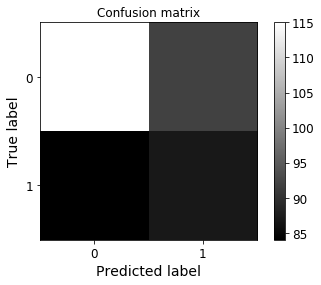

In [131]:
y_true = []
y_pred = []

for x in y_test:
    if x == 'Yes':
        y_true.append(1)
    else:
        y_true.append(0)

for x in predictions:
    if x == 'Yes':
        y_pred.append(1)
    else:
        y_pred.append(0)

confusion_mat = confusion_matrix(y_true, y_pred)

print(confusion_mat)
plot_confusion_matrix(confusion_mat, 2)